In [ ]:
%pip install python-dotenv

: 

In [1]:
!uv pip install python-dotenv langchain-openai


Using Python 3.12.10 environment at: /Users/nhn/.pyenv/versions/3.12.10/envs/langgraph-lecture
Resolved 33 packages in 94ms                                         
Uninstalled 1 package in 1ms
Installed 33 packages in 42ms0.0                            
 + annotated-types==0.7.0
 + anyio==4.9.0
 + certifi==2025.6.15
 + charset-normalizer==3.4.2
 + distro==1.9.0
 + h11==0.16.0
 + httpcore==1.0.9
 + httpx==0.28.1
 + idna==3.10
 + jiter==0.10.0
 + jsonpatch==1.33
 + jsonpointer==3.0.0
 + langchain-core==0.3.67
 + langchain-openai==0.3.27
 + langsmith==0.4.4
 + openai==1.93.0
 + orjson==3.10.18
 - packaging==25.0
 + packaging==24.2
 + pydantic==2.11.7
 + pydantic-core==2.33.2
 + python-dotenv==1.1.1
 + pyyaml==6.0.2
 + regex==2024.11.6
 + requests==2.32.4
 + requests-toolbelt==1.0.0
 + sniffio==1.3.1
 + tenacity==9.1.2
 + tiktoken==0.9.0
 + tqdm==4.67.1
 + typing-extensions==4.14.0
 + typing-inspection==0.4.1
 + urllib3==2.5.0
 + zstandard==0.23.0


In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [1]:
from langchain_openai import ChatOpenAI

query = '인프런 강의에는 어떤 강의가 있나요?'

llm = ChatOpenAI(model='gpt-4o-mini')
llm.invoke(query)

AIMessage(content='인프런은 다양한 분야의 온라인 강의를 제공하는 플랫폼으로, 주로 IT, 프로그래밍, 데이터 사이언스, 머신러닝, 디자인, 마케팅 등 여러 주제를 다루고 있습니다. 여기에 포함된 강의 예시는 다음과 같습니다:\n\n1. **프로그래밍 언어**: Python, Java, JavaScript, C++, Ruby 등 다양한 프로그래밍 언어에 대한 기초 및 심화 강의.\n2. **웹 개발**: HTML, CSS, React, Vue.js 등 웹 프론트엔드 및 백엔드 개발 강좌.\n3. **데이터 사이언스**: 데이터 분석, 통계, 머신러닝, 데이터 시각화 관련 강의.\n4. **모바일 개발**: Android, iOS 앱 개발에 대한 강의.\n5. **디자인**: UX/UI 디자인, 그래픽 디자인, Adobe Photoshop, Illustrator 활용법.\n6. **마케팅**: 디지털 마케팅, SEO, 소셜 미디어 마케팅 관련 강의.\n\n각 강의는 초급, 중급, 고급 레벨로 나뉘어 있으며, 강사에 따라 다양한 스타일의 강의가 제공됩니다. 인프런에 접속하여 관심 있는 분야의 강의를 찾아보는 것을 추천합니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 273, 'prompt_tokens': 20, 'total_tokens': 293, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'f

In [3]:
%pip install -q langgraph


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage

class AgentState(TypedDict):
    messages: list[Annotated[AnyMessage, add_messages]]

In [5]:
from langgraph.graph import StateGraph, START, END

graph_builder = StateGraph(AgentState)


In [6]:
def generate(state: AgentState) -> AgentState:
    messages = state['messages']
    ai_message = llm.invoke(messages)
    return {'messages': [ai_message]}
    

In [7]:
graph_builder.add_node('generate', generate)
graph_builder.add_edge(START, 'generate')
graph_builder.add_edge('generate', END)


In [8]:
graph = graph_builder.compile()

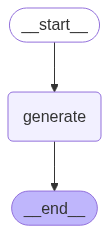

In [9]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [10]:
from langchain_core.messages import HumanMessage

initial_state = {'messages': [HumanMessage(query)]}
graph.invoke(initial_state)

{'messages': [AIMessage(content='인프런은 다양한 주제에 대한 온라인 강의를 제공하는 플랫폼으로, 주로 IT, 프로그래밍, 디자인, 데이터 분석, 인공지능 등과 관련된 강의가 많습니다. 여기 몇 가지 주요 카테고리를 소개합니다:\n\n1. **프로그래밍**: Python, Java, C++, JavaScript 등의 언어를 배우는 강의\n2. **웹 개발**: HTML, CSS, React, Vue.js 등 프론트엔드 및 백엔드 개발 강의\n3. **데이터 분석**: 데이터 시각화, Pandas, NumPy, SQL 등 데이터 분석 기법 강의\n4. **인공지능 및 머신러닝**: TensorFlow, PyTorch, 머신러닝 기초 및 심화 과정\n5. **디자인**: UX/UI 디자인, 포토샵, 일러스트레이터 등의 디자인 툴 사용법\n6. **블록체인 및 핀테크**: 블록체인 기술, 암호화폐, 핀테크 관련 강의\n7. **DevOps**: CI/CD, Docker, Kubernetes 등의 DevOps 관련 강의\n\n이 외에도 다양한 전문 분야와 주제에 대한 강의가 마련되어 있습니다. 특정 강의를 알고 싶으시면 인프런 웹사이트를 방문하여 검색해보시는 것이 좋습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 287, 'prompt_tokens': 20, 'total_tokens': 307, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-